In [3]:
%matplotlib inline

import json
from shapely.geometry import shape

import hydroengine as he

from shapely.geometry.polygon import Polygon
from descartes import PolygonPatch

from matplotlib import pyplot as plt

In [4]:
region = {
  "type": "Polygon",
  "coordinates": [[
      [5.986862182617186, 52.517369933821186],
      [6.030635833740234, 52.517369933821186],
      [6.030635833740234, 52.535439735112924],
      [5.986862182617186, 52.535439735112924],
      [5.986862182617186, 52.517369933821186]
    ]]
}

In [5]:
start = '2017-01-01'
stop = '2017-06-01'

# these are also defaults
percentile = 10
ndwi_threshold = 0,
scale = 10
    
water_mask = he.get_water_mask(region, start, stop, percentile, ndwi_threshold, scale)

In [4]:
water_mask = json.loads(water_mask)

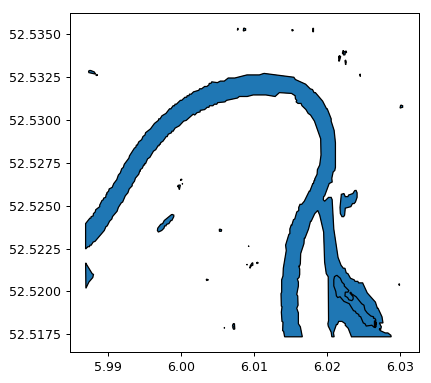

In [5]:
fig = plt.figure(1, figsize=(5,5), dpi=90)
ax = fig.add_subplot(111)

for f in water_mask["features"]:
    s = shape(f["geometry"])
    p = PolygonPatch(s)
    ax.add_patch(p)
    
    x, y = s.exterior.xy
    ax.plot(x, y, color='#000000', linewidth=0.1, solid_capstyle='round', zorder=2)

# TODO: handle interrior rings properly